# Spotify Top Hits Analysis (2000–2019)

Exploratory analysis of 2,000+ top Spotify tracks using SQL and Python to uncover what audio features characterize popular songs, how music trends have shifted over two decades, and which artists dominated the charts.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

df = pd.read_csv("songs_normalize.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [34]:
print(df.shape)
print(df.dtypes)
df.isnull().sum()

(2000, 18)
artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Load into SQLite for SQL Analysis

In [35]:
conn = sqlite3.connect(":memory:")
df.to_sql("spotify", conn, index=False, if_exists="replace")
print("Loaded into SQLite successfully.")

Loaded into SQLite successfully.


## Top 10 Most Frequent Artists

In [36]:
query = """
SELECT artist, COUNT(*) as track_count
FROM spotify
GROUP BY artist
ORDER BY track_count DESC
LIMIT 10
"""

top_artists = pd.read_sql(query, conn)
top_artists

,artist,track_count
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Taylor Swift,16
9,Katy Perry,16


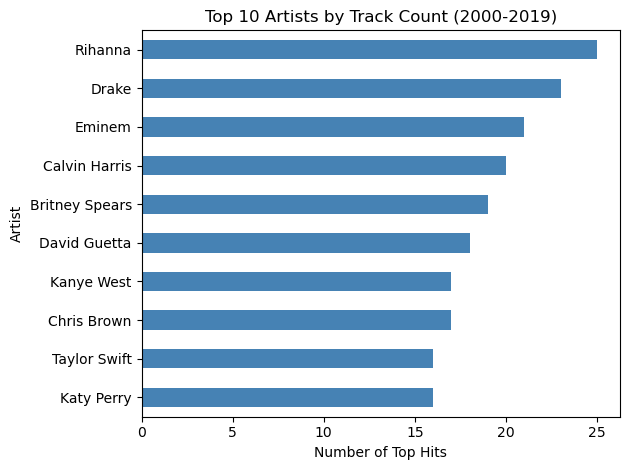

In [37]:
top_artists.plot(
    kind="barh",
    x="artist",
    y="track_count",
    title="Top 10 Artists by Track Count (2000-2019)",
    xlabel="Number of Top Hits",
    ylabel="Artist",
    legend=False,
    color="steelblue"
)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Music Trends Over Time
How have key audio features like energy, deaceability, and valence (positivity) changed over the years?

In [38]:
query = """
SELECT year,
    ROUND(AVG(energy), 3) as avg_energy,
    ROUND(AVG(danceability), 3) as avg_danceability,
    ROUND(AVG(valence), 3) as avg_valence
FROM spotify
GROUP BY year
ORDER BY year
"""

trends = pd.read_sql(query, conn)
trends.head()

,year,avg_energy,avg_danceability,avg_valence
0,1998,0.445,0.727,0.527
1,1999,0.738,0.669,0.574
2,2000,0.748,0.690,0.648
3,2001,0.725,0.674,0.661
4,2002,0.723,0.675,0.575


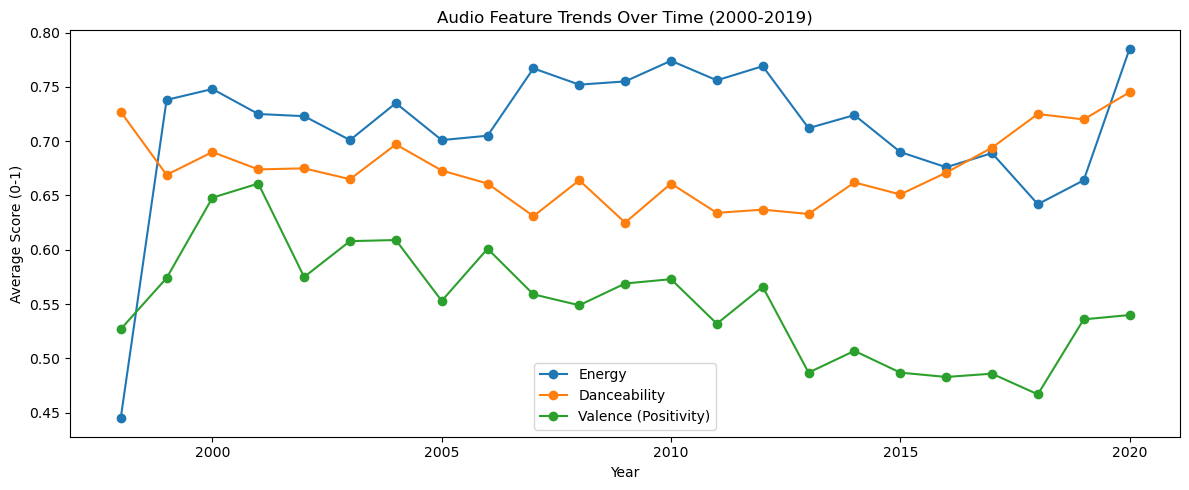

In [39]:
plt.figure(figsize=(12,5))
plt.plot(trends["year"], trends["avg_energy"], marker="o", label="Energy")
plt.plot(trends["year"], trends["avg_danceability"], marker="o", label="Danceability")
plt.plot(trends["year"], trends["avg_valence"], marker="o", label="Valence (Positivity)")
plt.title("Audio Feature Trends Over Time (2000-2019)")
plt.xlabel("Year")
plt.ylabel("Average Score (0-1)")
plt.legend()
plt.tight_layout()
plt.show()


## Most Popular Genres

In [40]:
query = """
SELECT genre, COUNT(*) as track_count, ROUND(AVG(popularity), 1) as avg_popularity
FROM spotify
GROUP BY genre
ORDER BY track_count DESC
LIMIT 10
"""

genres = pd.read_sql(query, conn)
genres

,genre,track_count,avg_popularity
0,pop,428,59.4
1,"hip hop, pop",277,64.1
2,"hip hop, pop, R&B",244,59.0
3,"pop, Dance/Electronic",221,53.4
4,"pop, R&B",178,57.8
5,hip hop,124,64.3
6,"hip hop, pop, Dance/Electronic",78,59.7
7,rock,58,67.0
8,"rock, pop",43,66.5
9,Dance/Electronic,41,51.8


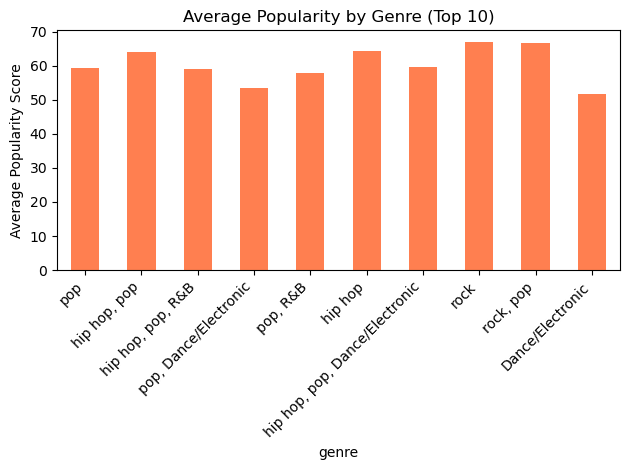

In [41]:
genres.plot(
    kind="bar",
    x="genre",
    y="avg_popularity",
    title="Average Popularity by Genre (Top 10)",
    ylabel="Average Popularity Score",
    legend=False,
    color="coral"
)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## What Makes a Song Popular?
Correlation between audio features and popularity score.

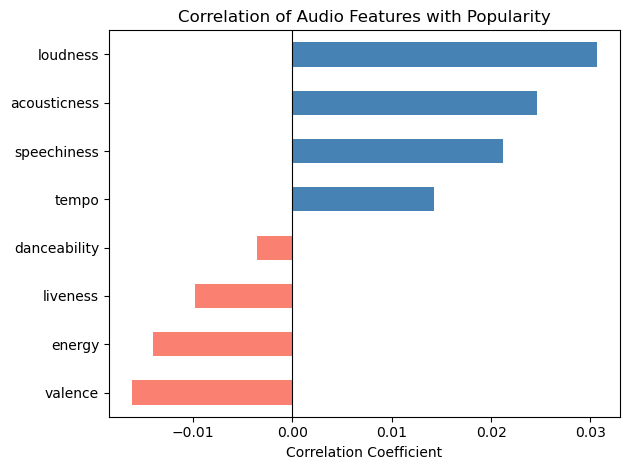

In [42]:
features = ["danceability", "energy", "loudness", "speechiness",
            "acousticness", "liveness", "valence", "tempo", "popularity"]

corr = df[features].corr()["popularity"].drop("popularity").sort_values()

corr.plot(
    kind="barh",
    title="Correlation of Audio Features with Popularity",
    xlabel="Correlation Coefficient",
    color=corr.map(lambda x: "steelblue" if x >= 0 else "salmon")
)

plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

## Key Insights

- **Rihanna, Drake, and Eminem** dominated the charts with the most top hits over the period (25, 23, and 21 tracks respectively)
- **Valence (positivity) has declined** noticeably since the early 2000s — popular music has trended darker/more melancholic over two decades, dropping from ~0.65 in 2000 to ~0.47 in 2018
- **Pure hip hop** had the highest average popularity score (64.3) despite having fewer tracks than pop, suggesting hip hop tracks tend to perform more consistently well
- **Rock** had the highest average popularity of any genre with significant volume (67.0), despite representing a much smaller share of top hits than pop
- **Loudness** shows the strongest positive correlation with popularity, while **energy and valence** are slightly negatively correlated — louder, less "happy" tracks tend to perform better
